## Huracanes 2005

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
dfHu = pd.read_csv("./irma.csv", sep=';')
dfHu.head(2)

,Lat,Lon,Wind,Pressure,Storm Type,Category,DateTime
0,16.4,-30.3,50,1004,Tropical Storm,-,2005-08-30 15:00:00
1,16.4,-31.2,60,1001,Tropical Storm,-,2005-08-30 21:00:00


In [5]:
dfEsc = pd.read_excel('escala_saffir_simpson.xlsx')
dfEsc.head(3)

,categoria,descripcion,color,nudos_min,nudos_max
0,TD,Depresion Tropical,deepskyblue,0,33
1,TS,Tormenta Tropical,lime,34,63
2,C1,Categoria 1,yellow,64,82


Coordenadas: 18°26′42″N 64°32′24″W Islas Vírgenes

In [21]:
y = 18.5
x = -64.3

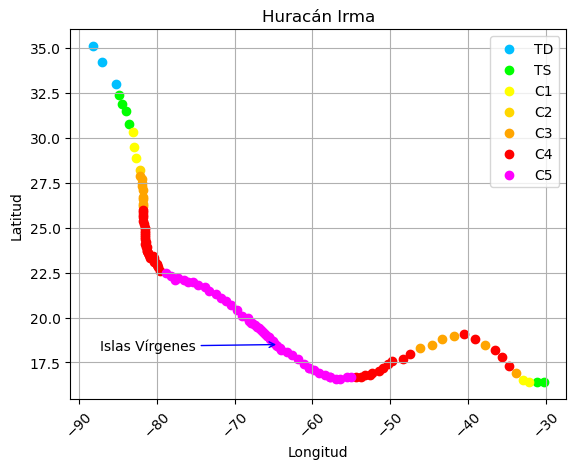

In [32]:
# Iterador para recorrer el DataFrame:
fig = plt.figure()

for r in dfEsc.iterrows():
    cat = r[1]['categoria']
    color = r[1]['color']
    nudos_min = r[1]['nudos_min']
    nudos_max = r[1]['nudos_max']
        
    aux = dfHu[(dfHu.Wind >= nudos_min) & (dfHu.Wind <= nudos_max)]
    if len(aux) > 0:
        #print(cat, color, nudos_min, nudos_max, aux.shape)
        plt.scatter(aux.Lon, aux.Lat, color=color, label=cat)
        
plt.title("Huracán Irma")
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.annotate("Islas Vírgenes", xytext=(-75,18), xy=(x,y),ha='right',\
             va='bottom',arrowprops={'color':'blue','arrowstyle':'->'})
plt.savefig('irma2.pdf')
plt.show()

In [31]:
pdf = PdfPages("irma.pdf")
pdf.savefig(fig)
pdf.close()